# Metodología de la Simulación

In [1]:
print("inicio")

inicio


### 1. Identifique las variables 

Aquellas cuyo comportamiento define el comportamiento o la evoución global del sistema real.

### 2. Determine la distribución de probabilidad

Elija el tipo de distribución de probabilidad que mejor defina el comportamiento aleatorio de cada una de las variables del sistema identificadas en el paso anterior.

### 3. Modele las variables aleatorias 

Cosntruya un modelo fiel de la aleatoriedad de las variables del sistema. Simular el comportamiento del sistema implica generar muestras aleatorias de cada variable que sigan fielmente la distribución de probabilidad correspondiente.

### 4. Defina el modelo del sistema y los objetivos de la simulación 

Fije los objetivos y diseñe un modelo del sistema real que abstraiga sus propiedades más relevantes. Todo error en el modelo (o su implementación computacional) puede dar lugar a conclusiones equivocadas. 

Antes de experimentar con el modelo, asegurarse de que refleja fielmente el sistema real **validando** el mismo a partir de datos reales, para ello compare los resultados obtenidos de la simulación con los producidos por el sistema.

### 5. Diseñe el experimento

Diseñe un experimento así como las ejecuciones concretas del mismo, los escenarios que desea estudiar para alcanzar los objetivos fijados. El experimento consiste en generar valores de las variables cuyo comportamiento define el comportamiento del sistema y analizar este ante dichos valores.

### 6. Repita el experimento $n$ veces 

Así dispondrá de $n$ observaciones sobre el comportamiento del sistema, lo que permitirá entender su funcionamiento así como evaluar el desempeño del mismo frente a los diversos escenarios establecidos.

El **método Monte Carlo** se basa en la **Ley Fuerte de los Grandes Números** y el **Teorema del Límite Central**.

## Ejemplo

Calcule la probabilidad de que aparezcan dos caras lanzando tres veces una moneda al aire.

1. Analíticamente.
2. Mediante simulación.

Analiticamente:

# Cálculo analítico

Para calcular la probabilidad de obtener dos caras (`C`) y una cruz (`X`) al lanzar una moneda tres veces, necesitamos considerar todos los posibles resultados donde esto pueda ocurrir. Los posibles resultados donde ocurren exactamente dos caras y una cruz son:

- CCA
- CAC
- ACC

Como los lanzamientos de la moneda son eventos independientes, la probabilidad de cada secuencia específica de lanzamientos es el producto de las probabilidades de los resultados individuales. Si la moneda es justa, la probabilidad de cara (`C`) en un solo lanzamiento es 0.5 y la probabilidad de cruz (`X`) también es 0.5.

Por lo tanto, la probabilidad de cada combinación que resulta en dos caras y una cruz es:

P(CCA) = P(C) * P(C) * P(X) = 0.5 * 0.5 * 0.5 = 0.125
P(CAC) = P(C) * P(X) * P(C) = 0.5 * 0.5 * 0.5 = 0.125
P(ACC) = P(X) * P(C) * P(C) = 0.5 * 0.5 * 0.5 = 0.125

Ya que estos eventos son mutuamente excluyentes, la probabilidad total de obtener dos caras y una cruz es la suma de las probabilidades de cada uno de estos eventos:

P(dos caras en tres lanzamientos) = P(CCA) + P(CAC) + P(ACC) = 0.125 + 0.125 + 0.125 = 0.375


Lo que es igual que calcular 

$3C2 (0.5)^2(1-0.5)^1=\frac{3}{8}=37.5%$

Por simulación: Construimos el modelo en varios pasos.

**PASO 1**. Defina las variables que intervienen en el modelo.

In [8]:
# Número de simulaciones
n_simulaciones = 10000
contador_dos_caras = 0

**PASO 2**. Formule la distribución de probabilidad de cada variable.

In [12]:
import random

for _ in range(n_simulaciones):
    lanzamientos = [random.choice(['C', 'X']) for _ in range(3)]
    if lanzamientos.count('C') == 2:
        contador_dos_caras += 1

probabilidad_simulada = contador_dos_caras / n_simulaciones
print(f"Probabilidad simulada de obtener dos caras en tres lanzamientos: {probabilidad_simulada}")
print(f" {1-probabilidad_simulada}")


Probabilidad simulada de obtener dos caras en tres lanzamientos: 0.7521
 0.2479



|      |**Sol**|**Aguila**|
|------|-------|----------|
|f(x)|         p|          1-p|

**PASO 3**. Enumere la distribución acumulada de probabilidad de cada variable.

|      |**Sol**|**Aguila**|
|------|-------|----------|
|f(x)  |     0.3727  |          |
|F(x)  |      0.3727 |  0.6273        |

**PASO 4**. Establezca el intervalo de números aleatorios correspondiente a cada valor de cada una de las variables.

|           |**Sol**|**Aguila**|
|-----------|-------|----------|
|f(x)       |       |          |
|F(x)       |       |          |
|Intervalos |       |          |

**PASO 5**. Genere números aleatorios.

**PASO 6**. Simule un lanzamiento.

Si Número de caras = 2       

¿Aparecen dos caras? = **1**

Si Número de caras ≠ 2       

¿Aparecen dos caras? = **0**

**PASO 7**. Obtenga la gráfica de estabilización que indica que el tamaño de muestra utilizado es suficiente para 
garantizar la convergencia del resultado.

In [13]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [14]:
def volados(n):
    caras = 0
    for i in range(n):
        u = random.uniform(0,1)
        if u <= 0.5:
            caras += 1
    return caras

In [15]:
def caras(m):
    favorable = 0
    if volados(3) == m:
        favorable +=1
    return favorable

In [16]:
def experimento(iteraciones):
    i = 0
    favorables=0
    Lista = []
    while i <= iteraciones:
        favorables = favorables + caras(2)
        i += 1
        probabilidad = favorables/i
        Lista.append(probabilidad)
    return Lista

In [17]:
exp = experimento(2000)

In [18]:
np.mean(exp)

0.395864634080561

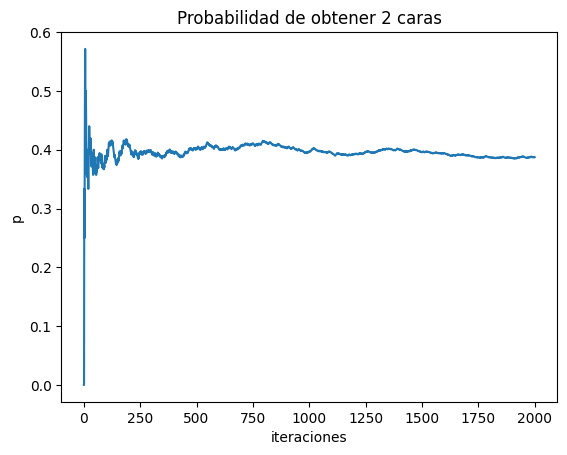

In [24]:
plt.plot(exp)
plt.xlabel('iteraciones')
plt.ylabel('p')
plt.title('Probabilidad de obtener 2 caras')
plt.show()

**PASO 8**. Replique el modelo.

In [20]:
def simulacion_caras(repeticiones):
    List = []
    for i in range(repeticiones):
        List.append(np.mean(experimento(1000)))
    return List

In [21]:
simulacion = simulacion_caras(50)

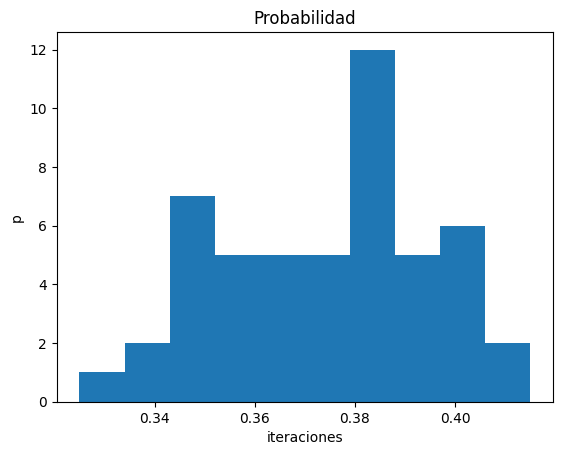

In [22]:
plt.hist(simulacion)
plt.xlabel('iteraciones')
plt.ylabel('p')
plt.title('Probabilidad')
plt.show()

**PASO 9**. Calcule la probabilidad de que aparezcan dos caras lanzando tres veces una moneda al aire y su desviación 
estándar.

In [23]:
np.mean(simulacion), np.var(simulacion), np.std(simulacion)

(0.3743205280261227, 0.0004135891339124883, 0.020336890959841633)

**PASO 10**. Halle el intervalo de confianza de la probabilidad de queaparezcan dos caras lanzando tres veces una moneda 
al aire con un nivel de confianza del $95 \%$.

# Intervalo de Confianza para la Media

El intervalo de confianza para la media poblacional (μ) se calcula como:

$ \bar{X} \pm Z_{\alpha/2} \times \left(\frac{S}{\sqrt{n}}\right)  $

Donde:
- \( $\bar{X}$ \) es la media de la muestra.
- \( $Z_{\alpha/2}$ \) es el valor crítico de la distribución normal estándar para un nivel de confianza dado (por ejemplo, 1.96 para el 95% de nivel de confianza).
- \( S \) es la desviación estándar de la muestra.
- \( n \) es el tamaño de la muestra.

In [25]:
import numpy as np
import scipy.stats as stats

# Suponiendo que 'simulacion' es tu array de datos
media_muestra = np.mean(simulacion)
desviacion_estandar_muestra = np.std(simulacion, ddof=1)
n = len(simulacion)
Zalpha_2 = stats.norm.ppf(0.975)  # Valor Z para el 95% de nivel de confianza

margen_error = Zalpha_2 * (desviacion_estandar_muestra / np.sqrt(n))
intervalo_confianza = (media_muestra - margen_error, media_muestra + margen_error)


In [26]:
margen_error

0.005694224834115401

In [27]:
intervalo_confianza

(0.3686263031920073, 0.3800147528602381)

# Fin